## 5 ML classifications (Abalone)

In [27]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/abalone.csv", index_col=None)
df["Sex"] = df["Sex"].map({"F": 0, "M": 1, "I": 2})
df


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Check NaN

In [28]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### Count label (graph)

Text(0.5, 1.0, 'Rings')

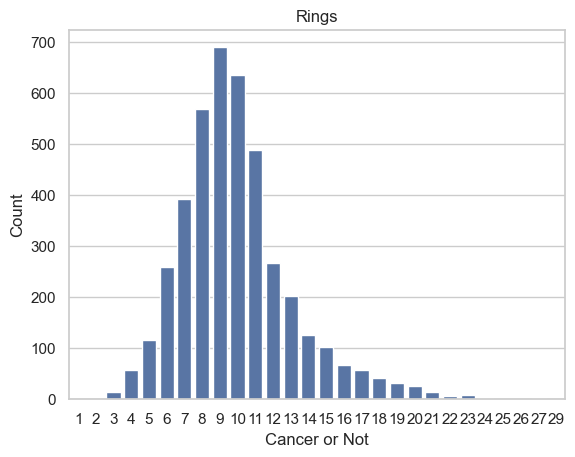

In [29]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Rings")

### Count label (number)

In [30]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

### Check Histograms by Column

/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_68583/37914476.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_68583/37914476.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: xlabel='Diameter', ylabel='Density'>

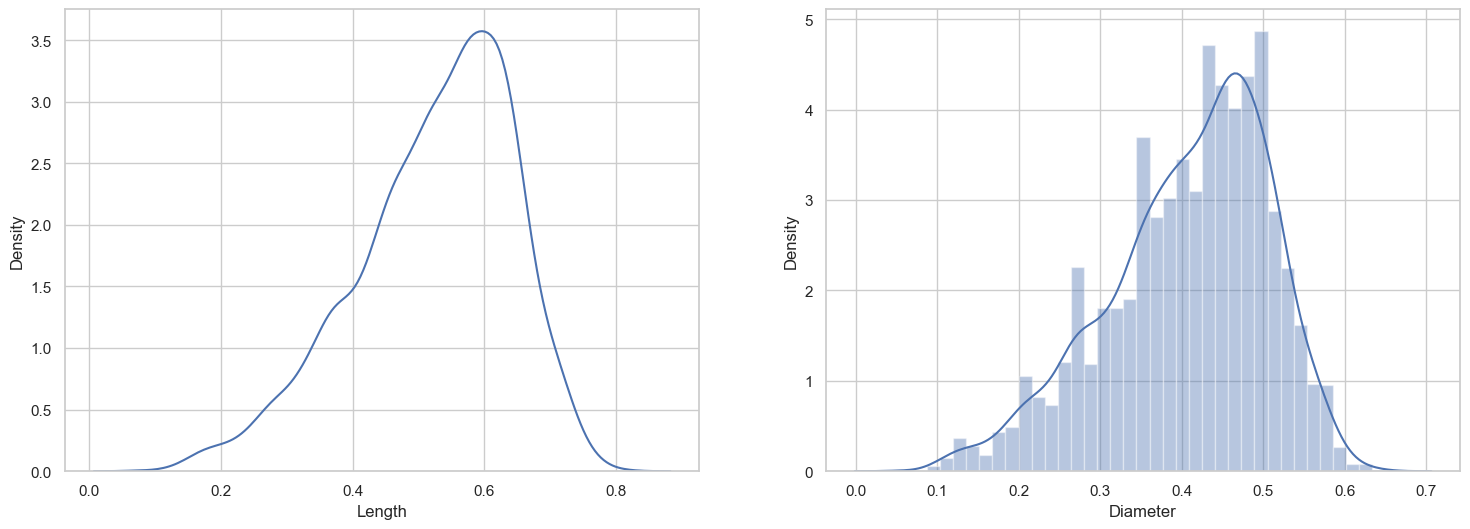

In [31]:
# 여기서는 Length와 Diameter 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

### Check the scatterplot

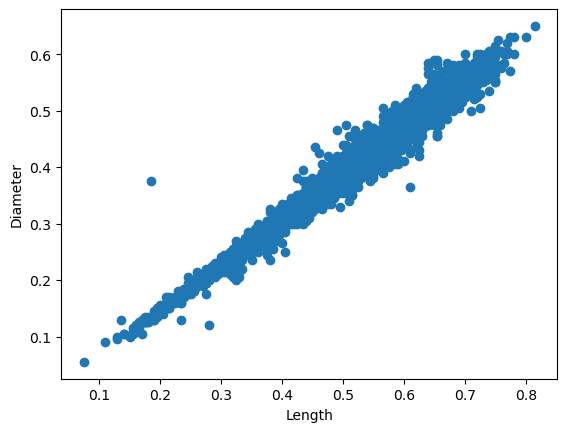

In [6]:
plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

### Examine each correlation

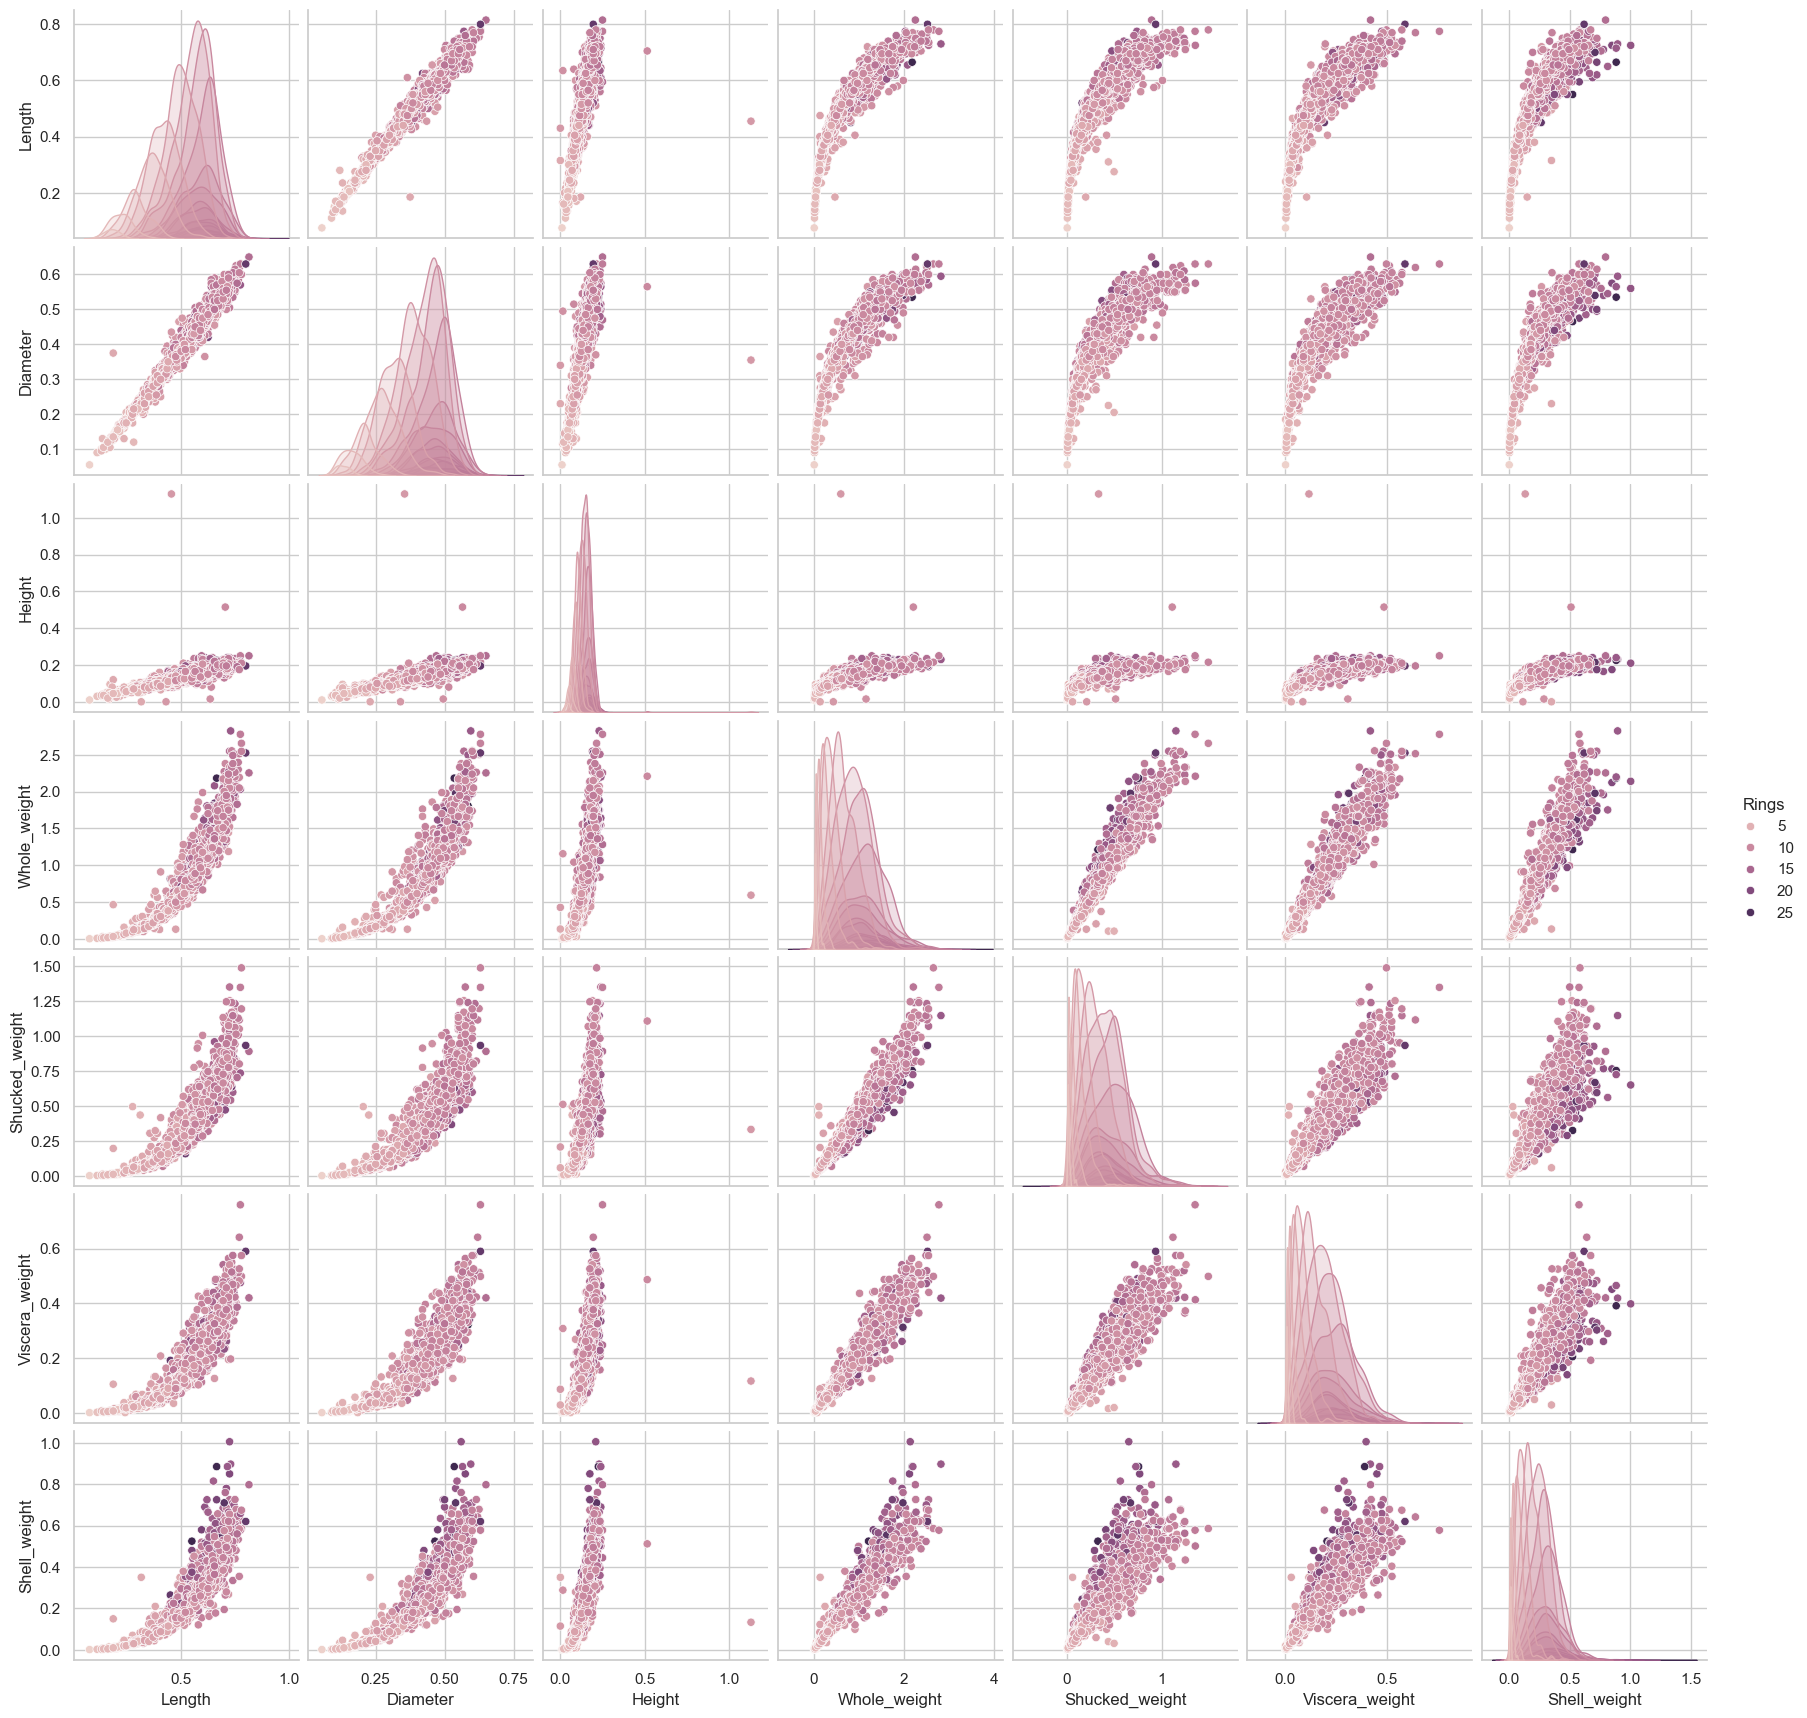

In [32]:
sns.pairplot(df,
             vars=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
            hue ='Rings')
plt.show()

### Verifying the scope and outlier of a particular column


/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_68583/140688713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df, palette="Set3")


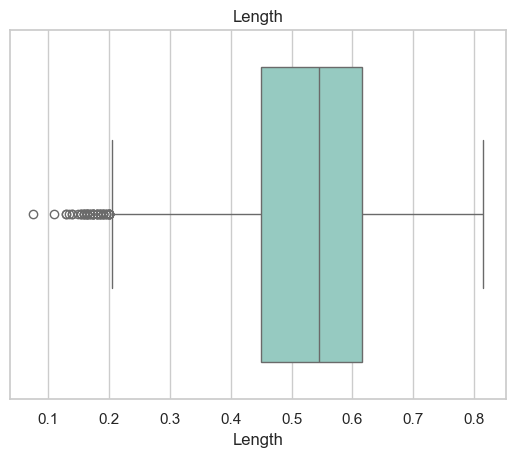

In [33]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

### Check Histograms for Each Column

/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_68583/111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


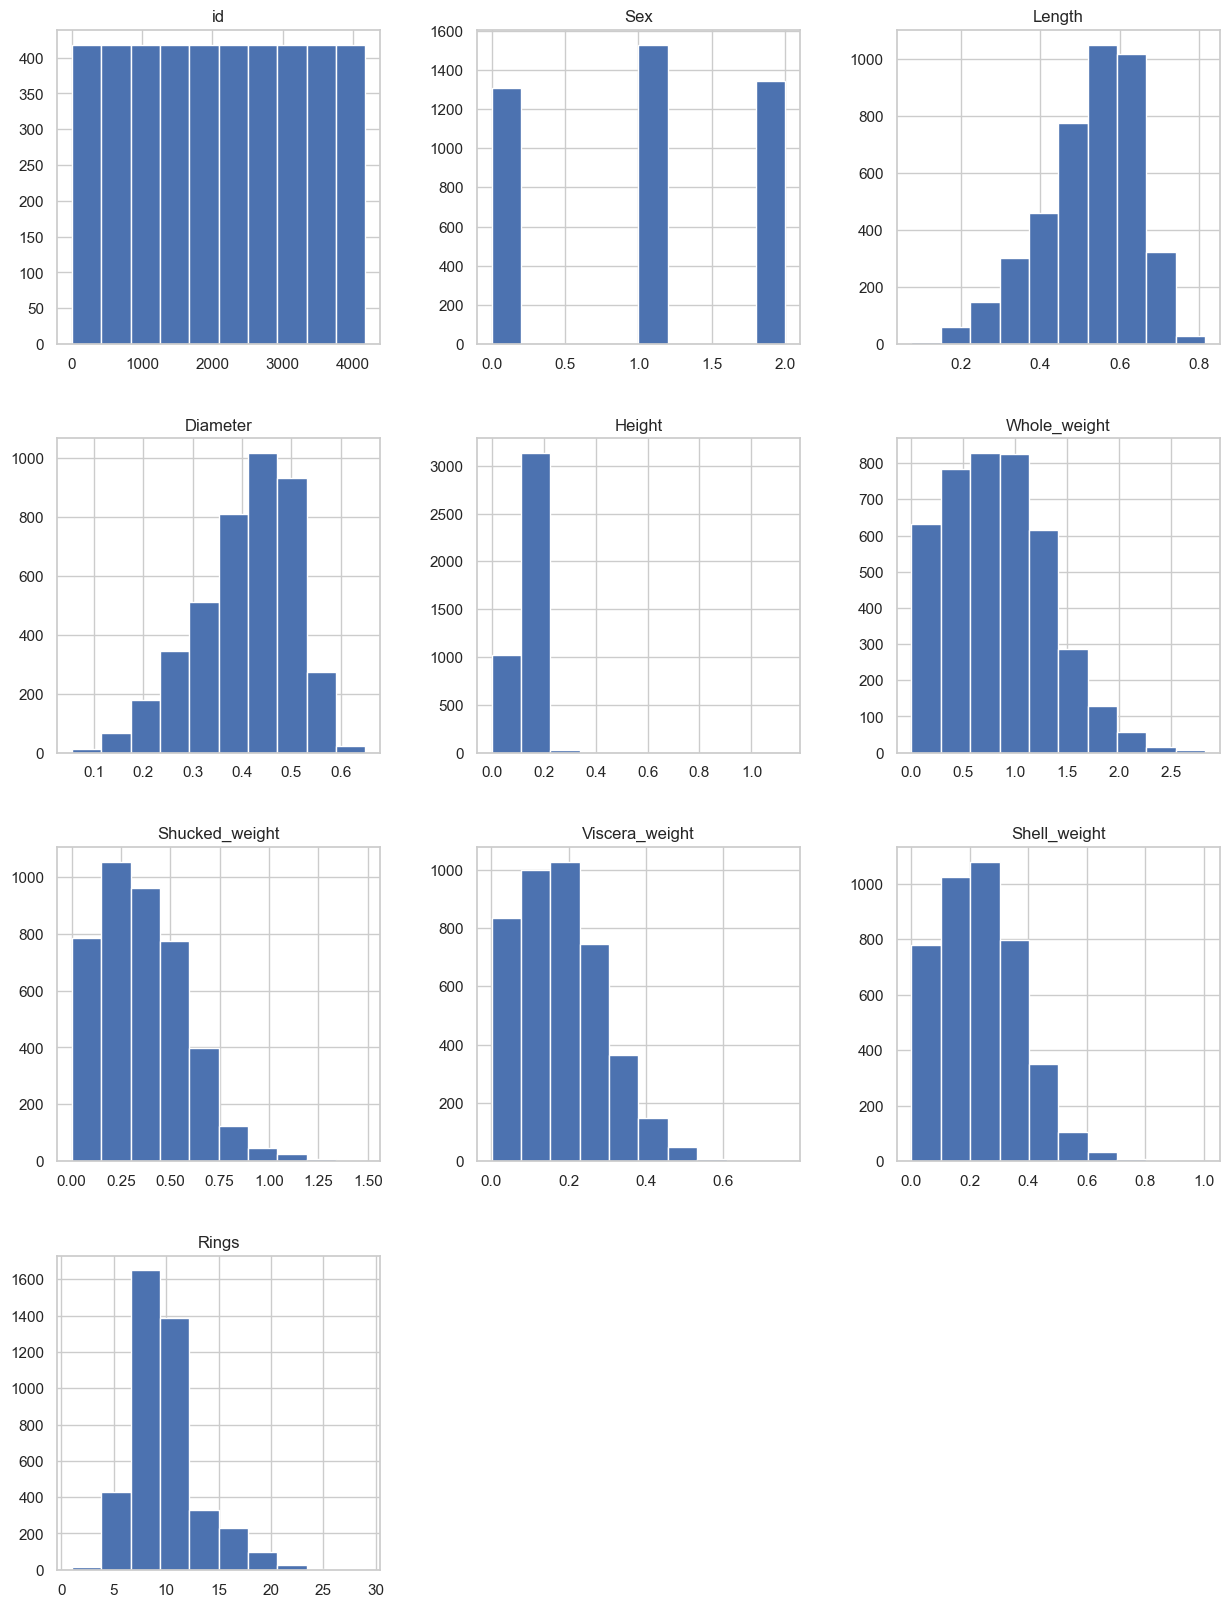

In [34]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [35]:
# 1열부터 8열까지가 입력 데이터 X
X = df.iloc[:, :9]

# 9열이 레이블 y
y = df.iloc[:, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

### SVM

In [36]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.1368421052631579
[[  0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  10   3   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  36   4   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  53  10   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 101  13   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 122  17   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 124  28   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 120  19   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  92  29   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  80  13   0   0   0   0   0   0   0   0   0   0
    0   0 

### LR

In [37]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.14545454545454545
[[  0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  13   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  40   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  63   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   1 113   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 139   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 152   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 139   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 121   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  93   0   0   0   0   0   0   0   0   0  

/opt/anaconda3/envs/tabnet/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RF

In [38]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.24401913875598086
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 13 14  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 10 19 24  4  4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 25 34 33 13  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  5 21 54 34 18  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 39 49 39 15  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 15 37 34 32  5  5  1  2  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  6  8 28 35 31  4  5  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  5 18 27 26  3  5  2  1  2  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5  9 15  8  5  1  1  2  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  8  9  0  4  3  0  2  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  3  7  4  2  1  3  0  1  0  0  0  0

### DT

In [39]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.19808612440191387
[[ 1  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  4  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 11 16  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 18 17  9  4  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 25 27 31 12  6  3  2  0  1  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12 26 42 29 11  9  4  3  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 33 39 21 21 14  4  4  2  0  1  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  2 18 35 31 21 15  3  3  3  3  2  1  0  0  1  0  0  0  0]
 [ 0  0  0  1  5  8 30 24 14 14 13  5  4  1  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  4  8 18 25  9  7  7  5  3  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  4  2  3 10  7  7  6  4  1  2  1  2  0  1  0  1  0  0]
 [ 0  0  0  0  2  1  5  0  2  3  3  3  3  0  3  2  0  3  1  1  0  0  0]
 [ 0  0  0  0  0  2  1  2  4  4  3  3  0  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0

### KNN

In [40]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)

print("\n--- K-Nearest Neighbors Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- K-Nearest Neighbors Classifier ---
0.20574162679425836
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  1  1  4  1  0  1  1  1  0  1  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  6  6 17  3  2  4  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  4  4 24 16  5  4  2  3  0  0  0  0  0  1  0  0  0  0  0  0  0
   0]
 [ 0  0  2  3  7 25 26 30 15  3  0  0  3  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  0  2  6 11 26 48 19 15  7  1  2  0  0  0  0  1  0  0  0  0  0  0
   0]
 [ 0  0  0  1  1  3 10 40 44 28 13  5  6  1  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  3  2  9 14 42 35 18  5  5  2  2  0  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0  4  2  4  4 12 27 32 22  5  2  1  2  1  2  1  0  0  0  0  0  0
   0]
 [ 1  0  0  2  3  3  3  4 10 29 21  2  4  4  5  1  0  0  0  